# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [110]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [111]:
class Neuron:

  def __init__(self, weights, bias):
    self.bias = bias
    self.weights = weights

  def forward(self, inputs):
    z = self.bias + torch.sum(self.weights * inputs)
    return z


In [112]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [113]:
neuron = Neuron(weights, bias)
out = neuron.forward(inputs)
out

tensor(4.8400)

1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [114]:
class Linear:
  biases = torch.tensor([])
  weights = torch.tensor([])

  def __init__(self, weights, bias):
    self.biases = bias
    self.weights = weights

  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    return (inputs @ self.weights) + biases

In [115]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [116]:
linear = Linear(weights, biases)
out = linear.forward(inputs)
out

tensor([ 4.8400,  0.1700, 10.3900])

1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [117]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [118]:
out2 = linear.forward(inputs)

In [119]:
out2

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [120]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)

  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    return (inputs @ self.weights) + self.biases

In [121]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [122]:
ln = Linear(4, 3)
ln.forward(inputs)

tensor([[-3.5336,  4.4163,  2.6103],
        [ 6.5975,  7.9730,  3.2488],
        [-6.8613,  5.7104,  1.2688]])

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [123]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [124]:
lay1 = Linear(n_features=4, n_neurons=6)
l1_out = lay1.forward(inputs)
l1_out

tensor([[-4.0654,  2.9241, -1.5349,  7.3049,  3.3445, -2.6842],
        [-8.1199,  2.1004,  1.4865, 13.7815,  4.0068, -6.5265],
        [-0.9611, -6.8814,  0.3057,  3.0819,  5.2688, -3.6015]])

In [125]:
lay2 = Linear(n_features=6, n_neurons=7)
l2_out = lay2.forward(l1_out)
l2_out

tensor([[-20.2615,  -6.9262,  -1.7117,  -0.0576,  10.9661,  -7.0423,  -4.5494],
        [-38.9239, -17.1720,  -0.4757,  -1.4619,  22.8787,  -3.4219, -14.4972],
        [-19.4891,  12.3078,   4.4511,  -6.0473,  18.1641,  -3.7739,   2.3788]])

## 2. Создание функций активации

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [126]:
class ReLU:
  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    return torch.where(inputs>0, inputs, 0)

In [127]:
input = torch.randn((4, 3))
input

tensor([[-0.9472, -0.9917,  0.3446],
        [-0.1373,  0.1788,  0.4281],
        [ 0.2438,  0.0964,  0.8000],
        [ 0.5726,  0.1372,  1.0481]])

In [128]:
r = ReLU()
r.forward(input)

tensor([[0.0000, 0.0000, 0.3446],
        [0.0000, 0.1788, 0.4281],
        [0.2438, 0.0964, 0.8000],
        [0.5726, 0.1372, 1.0481]])

2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [129]:
class Softmax:
  def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    # out = []
    # for row in inputs:
    #   out.append(torch.exp(row) / torch.sum(torch.exp(row)))
    # return out
    return torch.exp(inputs) / torch.sum(torch.exp(inputs))

In [130]:
input = torch.randn((4, 3))
input

tensor([[ 0.4789,  0.4651,  0.1151],
        [-2.3316,  0.4988,  0.4903],
        [ 0.4141, -0.1295, -1.1172],
        [ 0.6280,  0.8377,  0.4311]])

In [131]:
sm = Softmax()
sm.forward(input)

tensor([[0.1000, 0.0986, 0.0695],
        [0.0060, 0.1020, 0.1011],
        [0.0937, 0.0544, 0.0203],
        [0.1160, 0.1431, 0.0953]])

In [132]:
input_test = torch.tensor([1.2, 0.9, 0.4])
sm.forward(input_test)

tensor([0.4566, 0.3383, 0.2052])

In [133]:
input_test2 = torch.tensor([[1, 2], [3, 4]])
sm.forward(input_test2)

tensor([[0.0321, 0.0871],
        [0.2369, 0.6439]])

2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [134]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha

  def forward(self, inputs):
    return torch.where(inputs<=0, self.alpha * (torch.exp(inputs) - 1), inputs)

In [135]:
input = torch.randn((4, 3))
input

tensor([[ 0.1795, -0.7831, -0.3460],
        [-0.0269, -1.8693,  0.2822],
        [ 0.8106,  1.0368,  1.1713],
        [-1.3612, -0.5737,  1.3545]])

In [136]:
elu = ELU(1)
elu.forward(input)

tensor([[ 0.1795, -0.5430, -0.2925],
        [-0.0266, -0.8458,  0.2822],
        [ 0.8106,  1.0368,  1.1713],
        [-0.7436, -0.4366,  1.3545]])

## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e">

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [215]:
class MSELoss:
  def forward(self, y_pred, y_true):
    diff = torch.subtract(y_true, y_pred)
    sq_diff = torch.pow(diff, 2)
    return torch.mean(sq_diff)

In [216]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [217]:
ln = Linear(4, 1)
n_out = ln.forward(inputs)
n_out

tensor([[-1.0296],
        [ 6.2332],
        [-7.0112]])

In [218]:
mse = MSELoss()
mse.forward(n_out, y)

tensor(42.9720)

3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [141]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
    return -torch.sum(y_true * torch.log(y_pred))

In [142]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                        [2, 5, -1, 2], 
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [143]:
ln = Linear(n_features=4, n_neurons=3)
n_out = ln.forward(inputs=inputs)
n_out

tensor([[ 5.7974,  7.3483,  1.9854],
        [19.1573,  8.9972,  5.7742],
        [ 2.6845,  5.7087,  1.2718]])

In [144]:
sm = Softmax()
act_out = sm.forward(n_out)
act_out

tensor([[1.5770e-06, 7.4372e-06, 3.4861e-08],
        [9.9995e-01, 3.8682e-05, 1.5409e-06],
        [7.0135e-08, 1.4432e-06, 1.7077e-08]])

In [145]:
ccl = CategoricalCrossentropyLoss()
ccl.forward(y_true=y, y_pred=act_out)

tensor(29.8328)

3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [146]:
class MSELossL2:
    def __init__(self, lambda_, alpha):
        self.lambda_ = lambda_
        self.alpha = alpha

    def data_loss(self, y_pred, y_true):
        return torch.sum(torch.pow((y_true - y_pred), 2))

    def reg_loss(self):
        return self.lambda_ * (self.alpha ** 2).sum()

    def forward(self, y_pred, y_true):
        return self.data_loss(y_pred, y_true) + self.reg_loss()

In [147]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

layer = Linear(4, 1)
mse_l2 = MSELossL2(1, layer.weights)
print(mse_l2.forward(layer.forward(inputs), y))

tensor(206.7685)


## 4. Обратное распространение ошибки

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [242]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [237]:
class MSELoss:
    def forward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_squared = diff ** 2
        mean_diff = differences_squared.mean()

        return mean_diff

    def backward(self, y_pred, y_true):
        diff = y_pred - y_true
        differences_doubled = 2 * diff
        differences_div = differences_doubled / y_pred.size(0)
        return differences_div


4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [272]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return self.bias + torch.sum(self.weights * inputs)

    def backward(self, dvalue):
        self.dweights = dvalue * self.inputs
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

In [264]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])

neuron = Neuron(4)
out = neuron.forward(inputs)
print(out)

tensor([-13.6722])


4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [265]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)# <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y_example) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    dweight, dbias = neuron.backward(loss.backward(y_pred, y_example))
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * dweight
    neuron.bias -= learning_rate * dbias

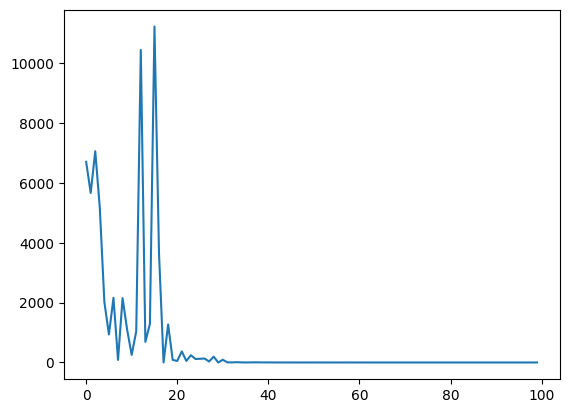

In [241]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1)
ax.plot(losses[:100])
plt.show()

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [246]:
# class MSELoss:
#   def forward(self, y_pred, y_true):
#     return # <реализовать логику MSE>
#
#   def backward(self, y_pred, y_true):
#     self.dinput = # df/dy^

# class MSELoss:
#     def forward(self, y_pred, y_true):
#         diff = torch.subtract(y_pred, y_true)
#         sq_diff = torch.pow(diff, 2)
#         return torch.mean(sq_diff)
#
#     def backward(self, y_pred, y_true):
#         self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0]
#         return self.dinput

class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.mean(torch.pow((y_pred - y_true), 2))

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^
        return self.dinput

4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [249]:
# class Neuron:
#     def __init__(self, n_inputs):
#         # <создать атрибуты объекта weights и bias>
#         self.weights = torch.randn(n_inputs)
#         self.bias = torch.randn(1)
#
#     def forward(self, inputs):
#         return torch.matmul(inputs, self.weights.T) + self.bias
#
#     def backward(self, dvalue):
#         # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
#         # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
#         self.dweights = dvalue
#         self.dinput = dvalue * self.weights  # df/dW
#         self.dbias = dvalue # df/db
#
#         return self.dweights, self.dbias


class Neuron:
    def __init__(self, n_inputs):
        self.n_inputs = n_inputs
        self.weights = torch.randn(1, n_inputs).T
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return self.bias + torch.sum(self.weights * inputs)

    def backward(self, dvalue):
        # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
        # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
        self.dweights = dvalue * self.inputs
        self.dinput = dvalue * self.weights
        self.dbias = dvalue

        return self.dweights, self.dbias

4.2.3 Допишите цикл для настройки весов нейрона

In [257]:
n_inputs = X.size(1)  # <размерность элемента выборки >
learning_rate = 0.01  # скорость обучения
n_epoch = 15  # количество эпох
optim = torch.optim.SGD((neuron.weights, neuron.bias), lr=learning_rate)

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(n_epoch):
    for x_example, y_example in zip(X, y):
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        dweight, dbias = neuron.backward(loss.backward(y_pred, y_example))

        optim.step()
        optim.zero_grad()

    # print(f"Epoch: {epoch} \tLoss: {len(losses)}")

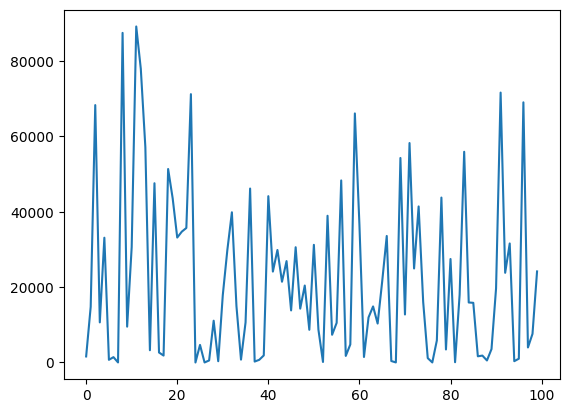

In [262]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1)
ax.plot(losses[:100])
plt.show()

4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [319]:
class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return (inputs @ self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        # print(dvalues)
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

# class Linear:
#     def __init__(self, n_features, n_neurons):
#         # <создать атрибуты объекта weights и biases>
#         self.n_features = n_features
#         self.n_neurons = n_neurons
#         self.weights = torch.randn(n_neurons, n_features).T
#         self.biases = torch.randn(n_neurons)
#
#     def forward(self, inputs):
#         self.inputs = inputs
#         return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>
#
#     def backward(self, dvalues):
#         self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
#         self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
#         self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX
#
# class MSELoss:
#     def forward(self, y_pred, y_true):
#         return torch.mean((y_pred - y_true) ** 2)
#
#     def backward(self, y_pred, y_true):
#         self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [320]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 100)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

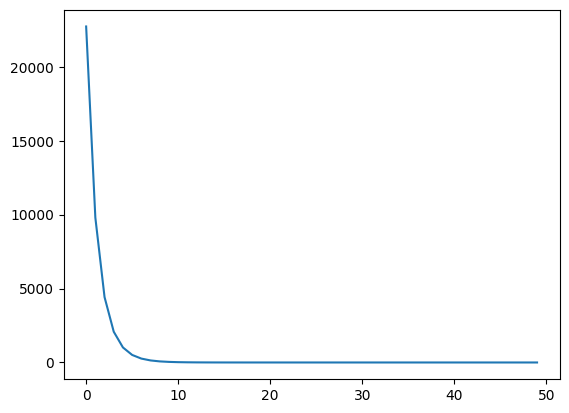

In [321]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1)
ax.plot(losses[::20])
plt.show()

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [331]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [332]:
class Activation_ReLU:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs.clip(min=0)
        return self.output

    def backward(self, dvalues):
        self.dinputs = dvalues.clone()
        self.dinputs[self.inputs <= 0] = 0

class Linear:
    def __init__(self, n_features, n_neurons):
        # <создать атрибуты объекта weights и biases>
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

In [339]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
    # <forward pass>
    # fc1 > relu1 > fc2 > loss
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # <backprop>
    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases


epoch 0 mean loss 8.726776123046875
epoch 200 mean loss 0.03692036494612694
epoch 400 mean loss 0.013214623555541039
epoch 600 mean loss 0.00939676258713007
epoch 800 mean loss 0.008328244090080261
epoch 1000 mean loss 0.007932674139738083
epoch 1200 mean loss 0.007664048578590155
epoch 1400 mean loss 0.007446123752743006
epoch 1600 mean loss 0.007260313257575035
epoch 1800 mean loss 0.007094200700521469
epoch 2000 mean loss 0.00695009483024478


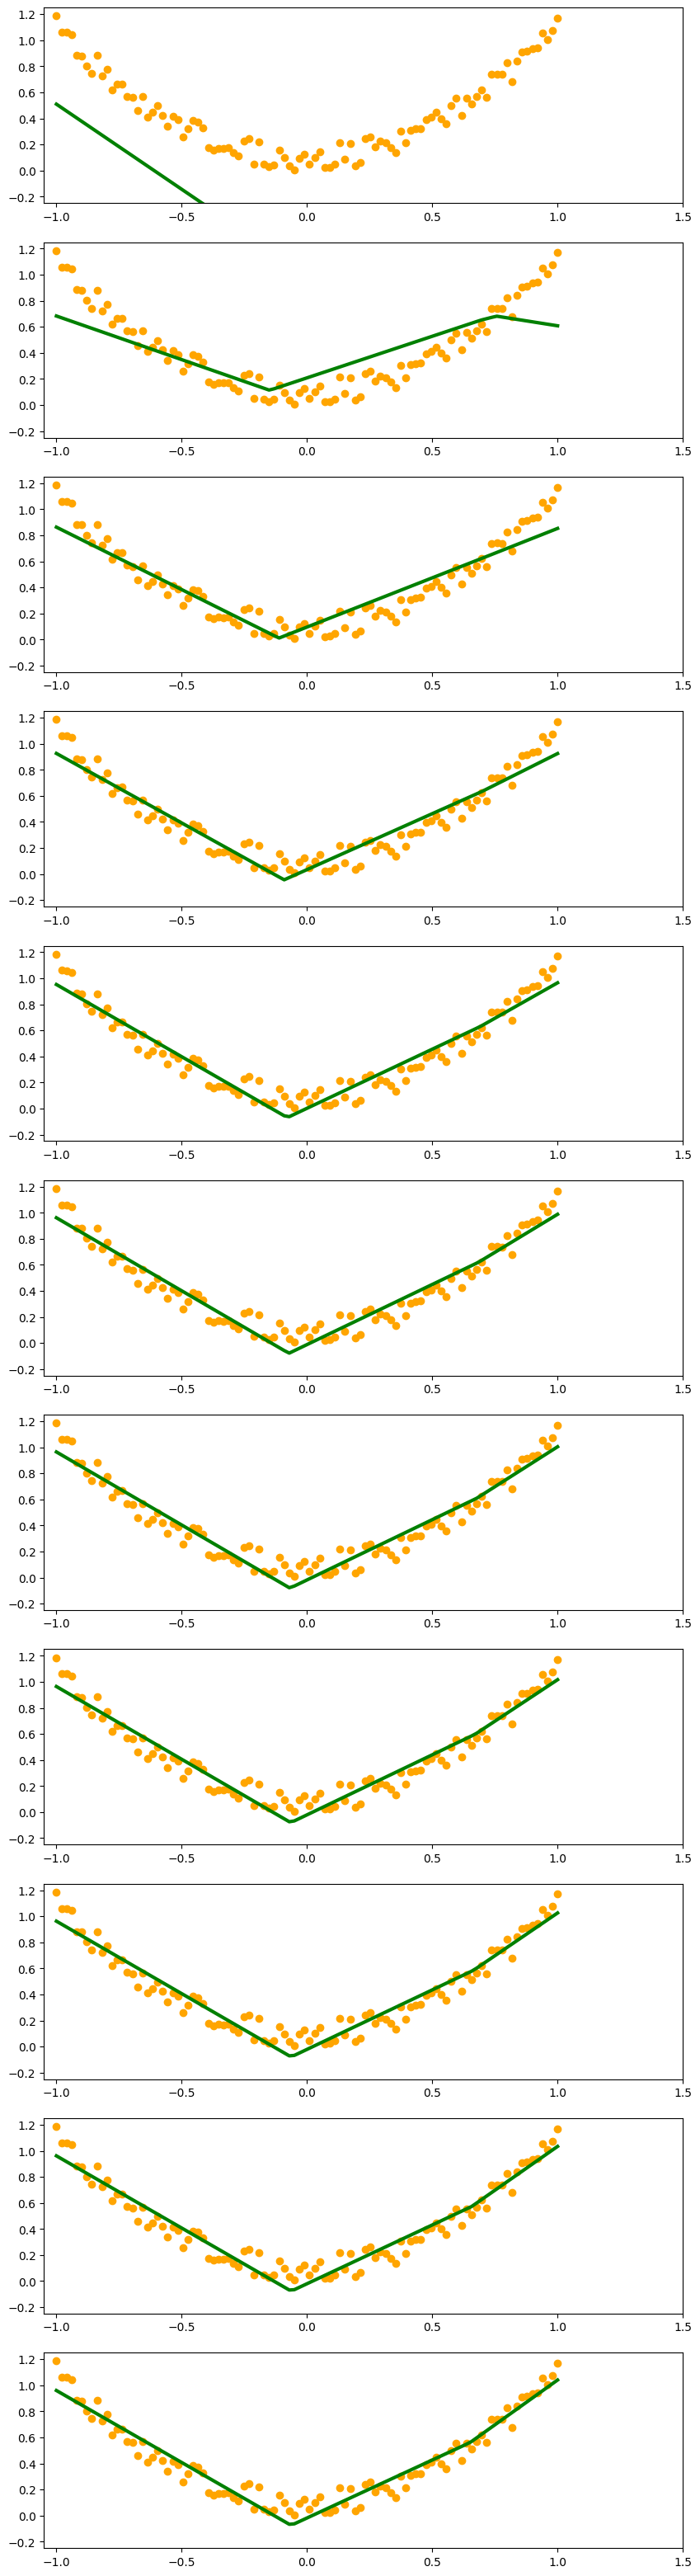

In [341]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)